### Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import os
os.chdir('D:\\Learning\\CU\\Courses\\EDM\\Output')

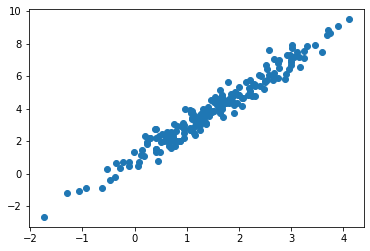

In [2]:
np.random.seed(123)

X=np.random.randn(200)+1.5
# Arrasy of 200 values of x with means of 1 (by default) and sd of 1.5
res=0.5*np.random.randn(200)
# Generate 200 residuals with sd of 0.6
y=1+2*X+res

twoDData=np.c_[X,y]

plt.scatter(twoDData[:,0],twoDData[:,1])

In [3]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(twoDData)

PCA(n_components=2)

In [4]:
print(pca.components_)

[[-0.43316568 -0.90131431]
 [-0.90131431  0.43316568]]


In [5]:
print(pca.explained_variance_)

[5.75175781 0.04167795]


#### Explanation:  
Two vectors represent the principal axes of the data: (-0.43,-0.90)(explained: 5.75), (-0.90,0.43)(explained:0.04).  
With the pca vector information, we can use it to transform the original data.  

For example, it can be used for dimension reduction if the number of principal component is smaller than the original data dimensions.

In [6]:
pca=PCA(n_components=1)
pca.fit(twoDData)
twoDData_dr=pca.transform(twoDData)

print("original shape:",twoDData.shape)
print("transformed shape:",twoDData_dr.shape)

original shape: (200, 2)
transformed shape: (200, 1)


### PCA for Dimension Reduction

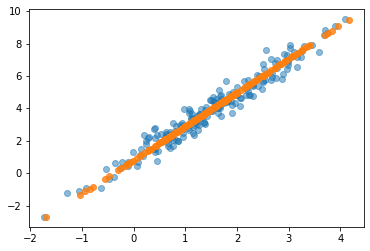

In [7]:
# perform the inverse transform of the reduced data and plot it along with the orginal data to understand the effect
twoDData_new=pca.inverse_transform(twoDData_dr)
plt.scatter(twoDData[:,0],twoDData[:,1],alpha=0.5)
plt.scatter(twoDData_new[:,0],twoDData_new[:,1],alpha=0.8)

### Example: Intelligent Tutoring System  
This system gives students hints based on how they perform on math problems. We want to see if we can build a decision tree to help teachers decide which students to follow up with, based on students' performance in Assistments.  
  
Variables:  
    id - student id  
    prior_prob_count - The number of problems a student has done in the system prior to the current session  
    prior_percent_correct - The percentage of problems a student has answered correctly piror to the current session  
    problems_attempted - The number of problems a student has attempted in this current session  
    mean_correct - The percentage of correct problems in this currect session  
    mean_hint - The average number of hints the student requested in the current session  
    mean_attempt - The average attempts for each problem  
    mean_confidence - The reported confidence a student has reported at the end of the session  

In [8]:
ICEdata=pd.read_csv("ICE6_Data.csv")
ICEdata

,id,prior_prob_count,prior_percent_correct,problems_attempted,mean_correct,mean_hint,mean_attempt,mean_confidence
0,172777,650,0.723077,4,1.000000,0.000000,1.000000,0.550159
1,175658,1159,0.800690,22,0.454545,2.227273,1.227273,0.437515
2,175669,1239,0.656981,11,0.636364,1.363636,1.727273,0.511060
3,176151,1246,0.729535,16,0.750000,0.562500,1.187500,0.491578
4,176165,1299,0.568129,6,0.333333,2.166667,2.000000,0.409887
...,...,...,...,...,...,...,...,...
337,253464,9,0.222222,23,0.782609,0.000000,1.347826,0.602103
338,253517,6,0.833333,16,0.562500,0.562500,2.062500,0.571269
339,255494,12,0.750000,3,0.666667,0.666667,1.333333,0.563379
340,256227,84,0.678571,3,0.333333,1.666667,1.333333,0.567501


In [9]:
ICEdata_noid=ICEdata.drop(['id'],axis=1)
icepca=PCA(n_components=7)
icepca.fit(ICEdata_noid)

print("The principal components are:")
print(icepca.components_)
print("The explained variances are:")
print(icepca.explained_variance_)

The principal components are:
[[ 9.99998379e-01  3.25231653e-05  1.72229676e-03  6.65415156e-05
   4.97054823e-04  1.49367002e-04  1.15030348e-05]
 [-1.73541120e-03  1.03037706e-03  9.99602228e-01  2.30861751e-03
   2.23020180e-02  1.69662730e-02 -8.64582845e-04]
 [-3.87330335e-04 -3.27396081e-02 -2.70451869e-02 -1.24635620e-01
   6.73010236e-01  7.27812593e-01  2.92226368e-03]
 [ 2.29120283e-04  3.26414469e-02  3.68040760e-03  1.78860696e-01
  -7.05688901e-01  6.84765009e-01  5.46329794e-03]
 [ 1.63571033e-04 -1.96336169e-01  6.70115719e-03 -9.52166155e-01
  -2.19898499e-01  3.19977181e-02 -7.35362922e-02]
 [ 1.91456302e-05 -9.79282671e-01  7.60612436e-04  1.99617334e-01
  -2.17110326e-03 -7.96442781e-03  3.30097853e-02]
 [ 1.73255132e-06 -1.78647923e-02 -1.39538358e-03  7.74726598e-02
   1.42375081e-02  3.24800341e-03 -9.96726458e-01]]
The explained variances are:
[1.01909636e+05 9.65917304e+01 8.07223611e-01 4.21069102e-01
 4.13364216e-02 1.60996431e-02 1.08938450e-02]


#### explanation;  
the first two components explainning substantially more variances than other components, so we reduce the data to two dimensions and plot it.

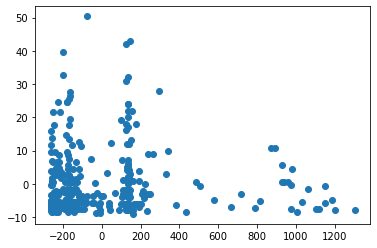

In [10]:
icedata_dr=icepca.transform(ICEdata_noid)
plt.scatter(icedata_dr[:,0],icedata_dr[:,1])

In [11]:
#icepcar=PCA(n_components=2)
#icepcar.fit(ICEdata_noid)
#icedatar=icepcar.transform(ICEdata_noid)
#plt.scatter(icedatar[:,0],icedatar[:,1])

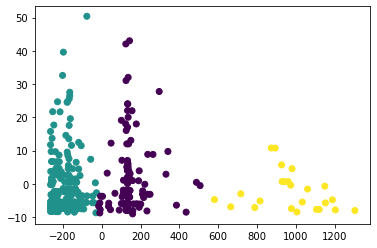

In [12]:
# From the scatter plot, we can clearly see three clusters
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3)
kmeans.fit(icedata_dr)
cluster_kmeans=kmeans.predict(icedata_dr)

plt.scatter(icedata_dr[:,0],icedata_dr[:,1],c=cluster_kmeans,cmap='viridis')
# Use cluster_kmeans as the indicator for clusters

In [13]:
pip install pca

Note: you may need to restart the kernel to use updated packages.


[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


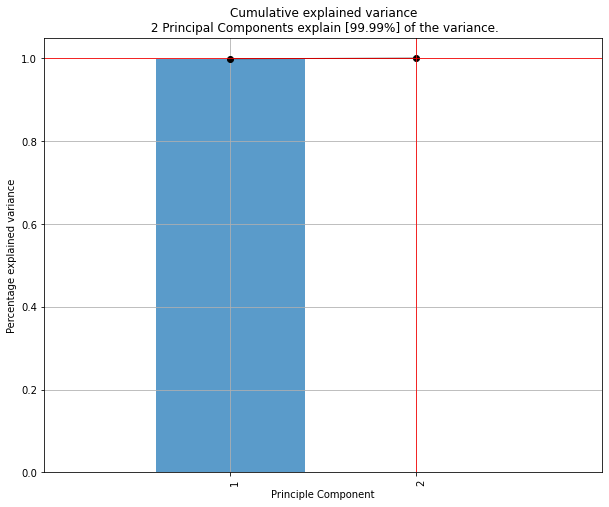

<Figure size 432x288 with 0 Axes>

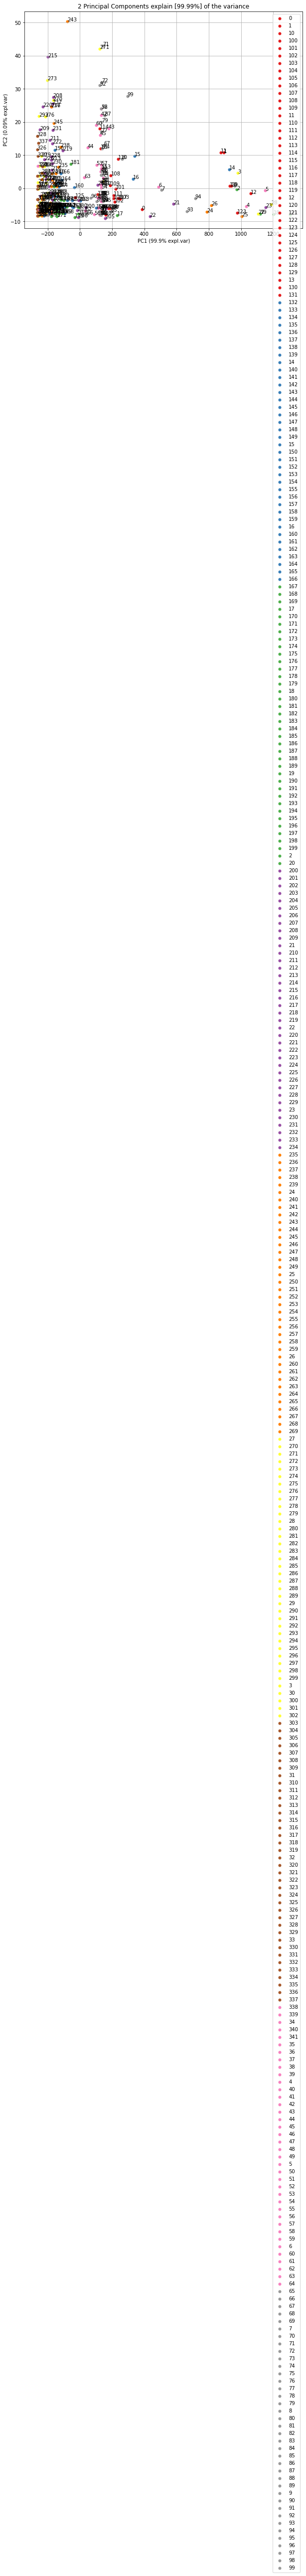

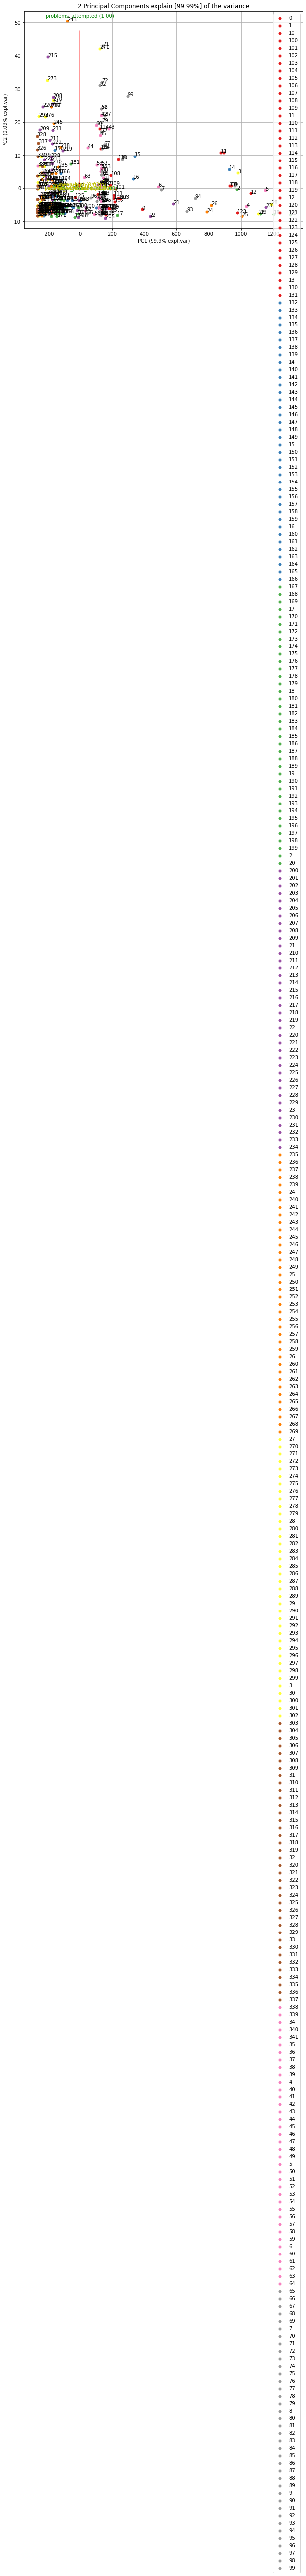

In [16]:
from pca import pca
model=pca(n_components=2)
results=model.fit_transform(ICEdata_noid)
fig,ax=model.plot()
fig,ax=model.scatter()
fig,ax=model.biplot(n_feat=7)

#### Thinking  
(1) What could the two dimensions mean?  
According to the explained variances, the two dimensions explain the most variables and contains the most data in the dataset (especially for PC1).  
Acoording to the principle components, in the two dimensions, PC1 has a strong positive loading (0.99) for the number of problems a student has done in the system prior to the current session, and PC2 has a strong positive loading (0.99) for the number of problems a student has attempted in this current session. The other variables seem to have both weak loading in the two main principle components. So it seems that PC1 actually represents the variable "prior_prob_count" and PC2 represents the variable "problems_attempted".  
In conclusion, the number of problems a student has done in the system prior to the current session can explain the performance of the student.  

(2)How would you intepret the KMeans clustering?
The result of Kmeans shows that the data is well distributed along the two dimensions. In this case, the clustering may indicate three groups/types of students perform differently on math problems.(I'm not sure of this)